In [1]:
import sys
sys.path.insert(0, '..')
import numpy as np
import matplotlib.pyplot as plt
import pyclifford as pc
import time

In [64]:
N = 4
classical_shadows = []
num_of_shadow = 2000

In [63]:
circ = pc.Circuit(N)
circ.gate(*[i for i in range(N)])

CliffordCircuit(
  |[0,1,2,3]|)
 Unitary:True

In [65]:
circ = pc.Circuit(N)
# Create global Clifford random gate
circ.gate(*[i for i in range(N)])
for povm in circ.povm(num_of_shadow):
    state = pc.ghz_state(N)
    state.measure(povm)
    classical_shadows.append(state)

In [67]:
classical_shadows[3]

StabilizerState(
   -ZXZY
   -XIIZ
   +IZIZ
   -YYXX)

$Tr(\hat{\rho}|\psi\rangle\langle \psi|)$

$\hat{\rho}=D\sigma-I$

In [13]:
fidelity_predictions = []

In [68]:
for shadow in classical_shadows:
    fidelity_predictions.append(shadow.expect(pc.ghz_state(N))*(2**N)-1)

Text(0.5, 1.0, '4 qubit GHZ state')

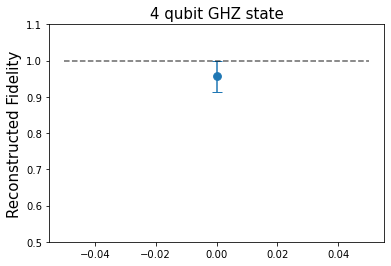

In [69]:
plt.errorbar(x = 0,y = np.mean(np.array(fidelity_predictions)),\
             yerr=np.std(np.array(fidelity_predictions))/np.sqrt(1000),capsize = 5)
plt.scatter(x = 0,y = np.mean(np.array(fidelity_predictions)),s= 60,)
plt.ylim([0.5,1.1])
plt.plot(np.linspace(-0.05,0.05,20),np.ones(20),"k--",alpha = 0.6)
plt.ylabel("Reconstructed Fidelity",fontsize = 15)
plt.title("{} qubit GHZ state".format(N),fontsize = 15)

In [16]:
circ = pc.Circuit(2)

In [17]:
circ.take(pc.H(0))

CliffordCircuit(
  |[0]|)
 Unitary:True

In [19]:
circ.take(pc.CNOT(0,1))

CliffordCircuit(
  |[0,1]|
  |[0]|)
 Unitary:True

In [28]:
circ.forward(pc.zero_state(2)).measure(pc.zero_state(2))

(array([1, 1]), -1.0)

In [22]:
circ.backward(pc.zero_state(2))

StabilizerState(
   +XI
   +XZ)

In [56]:
circ = pc.Circuit(2)

In [57]:
state = pc.zero_state(2)

In [59]:
print(state.to_qutip())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [51]:
circ.forward(state)

StabilizerState(
   +XX
   +ZZ)

In [31]:
circ.measure(0,1)

CliffordCircuit(
  |Mz[0,1]|
  |[0,1]|
  |[0]|)
 Unitary:False

In [38]:
circ.forward(pc.zero_state(2))

StabilizerState(
   -ZI
   +ZZ)

In [46]:
state = pc.ghz_state(2)
pc.ghz_state(2).measure(pc.paulis("XI"))

(array([1]), -1.0)

In [43]:
pc.ghz_state(2)

StabilizerState(
   +ZZ
   +XX)